In [ ]:
%cd /content
!rm -rf boltzmann-machines
!git clone --single-branch --depth=1 --branch with-models https://github.com/hannesdm/boltzmann-machines.git
%cd boltzmann-machines
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

from examples import callable_dbm_mnist
from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from boltzmann_machines import DBM
from boltzmann_machines.rbm import BernoulliRBM
from boltzmann_machines.utils import im_plot, Stopwatch

/content
Cloning into 'boltzmann-machines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 77 (delta 6), reused 35 (delta 2), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/boltzmann-machines


Using TensorFlow backend.


## Load the mnist data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
lb = preprocessing.LabelBinarizer()
Y_train_one_hot = lb.fit_transform(Y_train)
Y_test_one_hot = lb.transform(Y_test)

## Load a pretrained model and visualise the components
To prevent losing too much time on training a deep model, a working pretrained RBM will be used. <br/>
**Exercise** Observe the components (weights of each neuron) of the DBM and compare with the components of the previously trained RBM in exercise 1. What is the difference?<br/>
Can you explain the difference between the components of the first and second layer of the DBM?


In [ ]:
rbm1 = BernoulliRBM.load_model('/content/boltzmann-machines/models/dbm_mnist_rbm1/')
rbm2 = BernoulliRBM.load_model('/content/boltzmann-machines/models/dbm_mnist_rbm2/')
dbm = DBM.load_model('/content/boltzmann-machines/models/dbm_mnist/')
dbm.load_rbms([rbm1, rbm2])

INFO:tensorflow:Restoring parameters from /content/boltzmann-machines/models/dbm_mnist_rbm1/model
INFO:tensorflow:Restoring parameters from /content/boltzmann-machines/models/dbm_mnist_rbm2/model


INFO:tensorflow:Restoring parameters from /content/boltzmann-machines/models/dbm_mnist/model


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passi

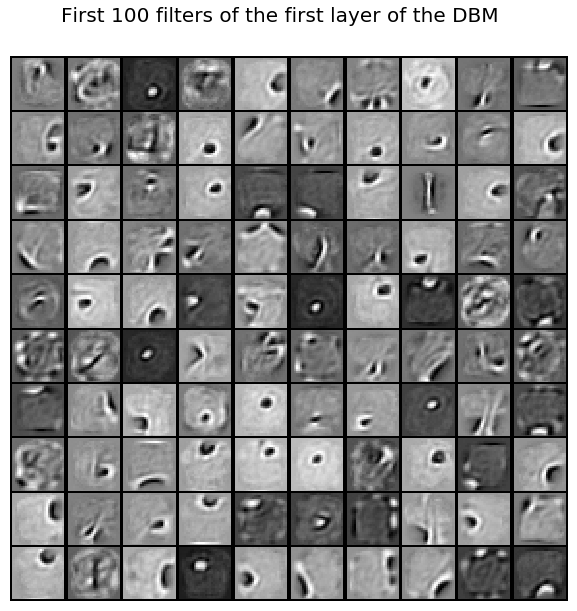

In [ ]:
W1_joint = dbm.get_tf_params(scope='weights')['W']

fig = plt.figure(figsize=(10, 10))
im_plot(W1_joint.T, shape=(28, 28), title='First 100 filters of the first layer of the DBM',
        title_params={'fontsize': 20}, imshow_params={'cmap': plt.cm.gray})

INFO:tensorflow:Restoring parameters from /content/boltzmann-machines/models/dbm_mnist/model


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passi

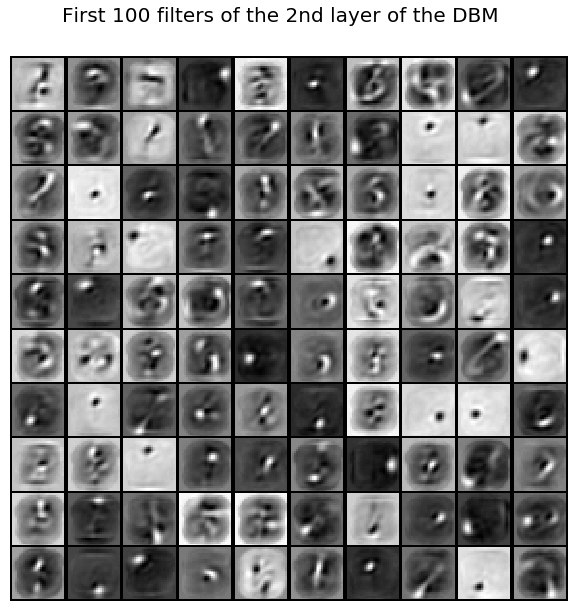

In [ ]:
W2_joint = dbm.get_tf_params(scope='weights')['W_1']
U_joint = W1_joint.dot(W2_joint)

fig = plt.figure(figsize=(10, 10))
im_plot(U_joint.T, shape=(28, 28), title='First 100 filters of the 2nd layer of the DBM',
        title_params={'fontsize': 20}, imshow_params={'cmap': plt.cm.gray})

## Sample the DBM
**Exercise** Comment on the quality of the samples and compare them with the samples from the RBM.<br/>
Do you see a difference in quality? Explain why.

INFO:tensorflow:Restoring parameters from /content/boltzmann-machines/models/dbm_mnist/model
Elapsed time: 1.906 sec


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passi

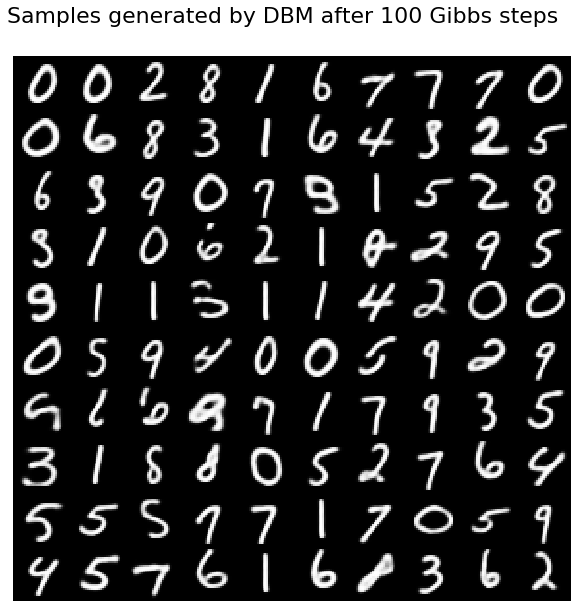

In [ ]:
gibbs_steps = 100

with Stopwatch(verbose=True) as s:
    V = dbm.sample_v(n_gibbs_steps=gibbs_steps)

fig = plt.figure(figsize=(10, 10))
im_plot(V, shape=(28, 28), title='Samples generated by DBM after '+str(gibbs_steps) + ' Gibbs steps',
        imshow_params={'cmap': plt.cm.gray})